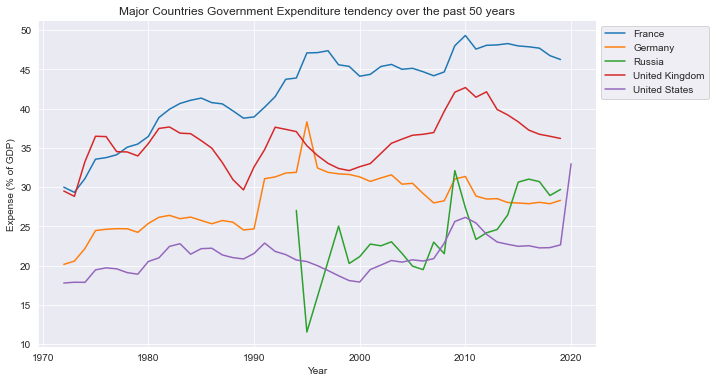

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

# Load data into a pandas DataFrame
gov_expenditure_df = pd.read_csv('data/total-gov-expenditure-gdp-wdi.csv')
inequality_df = pd.read_csv("data/tax-reduction-in-income-inequality.csv")

# Group data by entity
countries = ['Japan', 'Germany', 'Russia', 'United Kingdom', 'United States', 'France']
gov_expenditure_df = gov_expenditure_df[gov_expenditure_df['Entity'].isin(countries)]

grouped_data = gov_expenditure_df.groupby('Entity')

#Select Countries

fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each entity and plot its data
for name, group in grouped_data:
    sns.lineplot(x='Year', y='Expense (% of GDP)', data=group, label=name)

# Add axis labels and legend

plt.xlabel('Year')
plt.ylabel('Expense (% of GDP)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
ax.set_title('Major Countries Government Expenditure tendency over the past 50 years')
sns.despine()


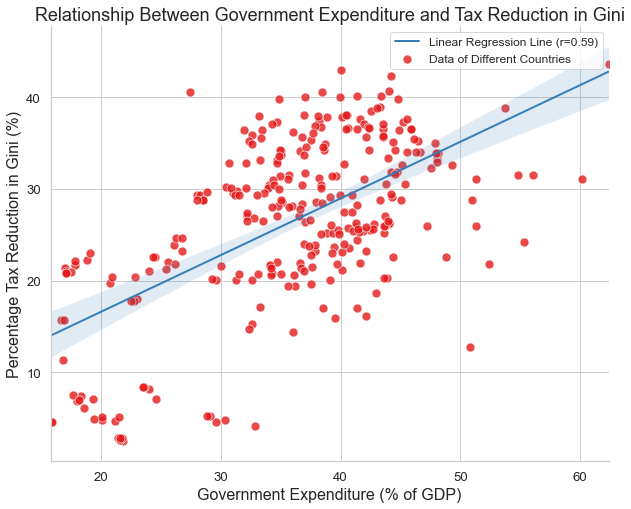

Correlation coefficient: 0.59


In [4]:
# Load data into a pandas DataFrame
gov_expenditure_df = pd.read_csv('data/total-gov-expenditure-gdp-wdi.csv')
inequality_df = pd.read_csv("data/tax-reduction-in-income-inequality.csv")

# Merge data together
merged_df = pd.merge(inequality_df, gov_expenditure_df, on=["Entity", "Code", "Year"])

# Calculate correlation coefficient
corr_matrix = merged_df[["Percentage reduction in Gini (OECD (2019))", "Expense (% of GDP)"]].corr()

# Perform linear regression
x = merged_df["Expense (% of GDP)"]
y = merged_df["Percentage reduction in Gini (OECD (2019))"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Set color palette
colors = sns.color_palette("Set1")

# Create scatter plot
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=x, y=y, color=colors[0], s=80, alpha=0.8)
sns.regplot(x=x, y=y, color=colors[1], scatter_kws={"s": 0}, line_kws={"lw": 2})
plt.xlabel("Government Expenditure (% of GDP)", fontsize=16)
plt.ylabel("Percentage Tax Reduction in Gini (%)", fontsize=16)
plt.title("Relationship Between Government Expenditure and Tax Reduction in Gini", fontsize=18)
plt.legend([ f"Linear Regression Line (r={r_value:.2f})","Data of Different Countries"], loc="upper right", fontsize=12)
sns.despine()
plt.show()

# Display correlation coefficient
print(f"Correlation coefficient: {corr_matrix.iloc[0,1]:.2f}")

Gini Coefficient Definition: The Gini coefficient is a measure of income or wealth distribution within a population. It is a number between 0 and 1, where 0 represents perfect equality (everyone has the same income or wealth), and 1 represents perfect inequality (one person has all the income or wealth, while everyone else has nothing).

The graph shown above shows a tendency that: when countries have more government expenditure, Gini reduction is higher. This means that more taxes are tend to be transfered to lowest income people. To conclude, when countries have more government expenditure, the countries inequality in after-tax revenue will become less. According to a OECD analysis: http://dx.doi.org/10.1787/5jxrjncwxv6j-en , inequality will hurt economic growth, so reducing inequality will help booster the economic growth for countries.



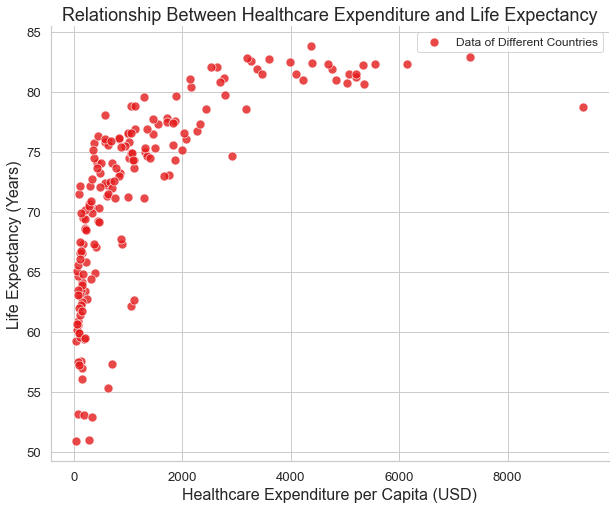

Correlation coefficient: 0.68


In [7]:
# Load data into a pandas DataFrame
life_expectancy_vs_healthcare_expenditure_df = pd.read_csv('data/life-expectancy-vs-healthcare-expenditure.csv')

# Drop any rows with missing values
life_expectancy_vs_healthcare_expenditure_df.dropna(inplace=True)
df = life_expectancy_vs_healthcare_expenditure_df[['Life expectancy at birth, total (years)', 'Current health expenditure per capita, PPP (current international $)']]

# Set color palette
colors = sns.color_palette("Set1")

# Create scatter plot
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, x='Current health expenditure per capita, PPP (current international $)', y='Life expectancy at birth, total (years)', color=colors[0], s=80, alpha=0.8)
plt.xlabel('Healthcare Expenditure per Capita (USD)', fontsize=16)
plt.ylabel('Life Expectancy (Years)', fontsize=16)
plt.title('Relationship Between Healthcare Expenditure and Life Expectancy', fontsize=18)
plt.legend(["Data of Different Countries"], loc="upper right", fontsize=12)
sns.despine()
plt.show()

# Display correlation coefficient
corr = df.corr()
print(f"Correlation coefficient: {corr.iloc[0,1]:.2f}")

 From this graph, we can see there is a positive relationship between healthcare expenditure and life expectancy: countries that spend more on healthcare generally having higher life expectancies. The correlation coefficient between the two variables is 0.68, which indicates a moderately strong positive correlation.

This plot can be used to illustrate how increased government spending on healthcare can lead to longer life expectancies, which in turn can lead to a healthier and more productive population, and ultimately, a stronger economy.